# Datos anteriores

In [202]:
import pandas as pd

datos = pd.read_csv("data/datos.csv")
datos.sample(5)

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
27733,29,0,39,8,13,1600,1.646663
46962,35,1,50,8,6,950,1.611322
74827,53,0,26,8,14,640,1.728252
66364,43,1,51,2,4,500,1.691507
71207,51,0,68,2,11,1000,1.739432


# Distribución de frecuencias para variables cualitativas

## ¿Por qué usar distribución de frecuencias?
Para entender el comportamiento de la base de datos. 
Por ejemplo: Para saber como se comportan las personas del género femenino, cuál es el tipo de ingreso, y análisis por el estilo

In [203]:
# Identificar variables cualitativas: Sexo, Ciudad, Color
datos.columns

Index(['Ciudad', 'Sexo', 'Edad', 'Color', 'Años de Estudio', 'Ingreso',
       'Altura'],
      dtype='object')

## Identificando frecuencias:

### Método 1: pandas.Series.value_counts()

#### Cuántos hombres y cuántas mujeres hay

In [204]:
datos.Sexo.value_counts()

Sexo
0    53250
1    23590
Name: count, dtype: int64

#### ¿Y en porcentaje?

#### Cambiando el nombre del índice

In [205]:
Sexo = {
  0: 'Masculino',
  1: 'Femenino'
}

In [206]:
sexos = (datos.Sexo.value_counts(normalize=True) * 100)

In [207]:
sexos_renamed = sexos.rename(index=Sexo)
sexos_renamed

Sexo
Masculino    69.299844
Femenino     30.700156
Name: proportion, dtype: float64

#### Porcentaje obtenido

In [208]:
datos.Sexo.value_counts(normalize=True) * 100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [209]:
datos.Sexo.value_counts(normalize=True).round(4) * 100

Sexo
0    69.3
1    30.7
Name: proportion, dtype: float64

In [210]:
frecuencia_sexo = datos.Sexo.value_counts()
frecuencia_sexo

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [211]:
porcentaje_sexo = datos.Sexo.value_counts(normalize=True).round(4) * 100

#### Crear nuevo dataframe

In [212]:
dist_frec_cualitativa = pd.DataFrame({'Frecuencia': frecuencia_sexo, 'Porcentaje': porcentaje_sexo})

In [213]:
dist_frec_cualitativa.rename(index=Sexo, inplace=True)

In [214]:
dist_frec_cualitativa

,Frecuencia,Porcentaje
Sexo,,
Masculino,53250,69.3
Femenino,23590,30.7


### Método 2: pandas.crosstab()

Se podrá ver dos variables en simultáneo: en este caso color y sexo

In [215]:
sexo = {
  0: 'Masculino',
  1:'Femenino'
}
color = {
  0: 'Indígena',
  2: 'Blanco',
  4: 'Negro',
  6: 'Amarillo',
  8: 'Pardo',
  9: 'Sin declarar'
}

In [216]:
frecuencia = pd.crosstab(datos.Sexo, datos.Color)

In [217]:
frecuencia.rename(index=sexo, columns=color, inplace=True)
frecuencia

Color,Indígena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Femenino,101,9621,2889,117,10862


#### ¿Y el porcentaje?

In [218]:
porcentaje = pd.crosstab(datos.Sexo, datos.Color, normalize=True)
porcentaje.rename(index=sexo, columns=color, inplace=True)
porcentaje

Color,Indígena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Femenino,0.001314,0.125208,0.037598,0.001523,0.141359


In [219]:
porcentaje = porcentaje.map(lambda x: x * 100)
porcentaje

Color,Indígena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Femenino,0.131442,12.520822,3.759761,0.152264,14.135867


### Distribución de ingreso en función de sexo y color

`aggfunc='mean'` -> indica que se quiere calcular la media de datos. Ingreso para cada combinación de sexo y color. Existen otras funciones de agregación como sum, count, etc.

`values=datos.Ingreso` -> especifica la variable numérica cuyos valores se agregarán en cada celda de la tabla

In [220]:
porcentaje = pd.crosstab(datos.Sexo,datos.Color, aggfunc='mean', values=datos.Ingreso)
porcentaje.rename(index = sexo, columns=color, inplace=True)
porcentaje

Color,Indígena,Blanco,Negro,Amarillo,Pardo
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Femenino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


La tabla mostrada entrega la media de infreso para cada combinación de Sexo y Color. Permite comparar, por ejemplo, si hay diferencias significativas en los ingresos promedio entre hombres y mujeres de diferentes etnias.

# Tablas de frecuencias cuantitativas

## 1. Especificando los límites de cada clase

A -> Más de 20 SM  
B -> De 10 a 20 SM  
C -> de 4 a 10 SM  
D -> de 2 a 4 SM  
e -> Hasta 2 SM  

*SM es el valor del salario mínimo (788 mil pesos colombianos al 2018)*

A -> Más de 15.760  
B -> De 7.880 a 15.760  
C -> de 3.152 a 7.880  
D -> de 1.576 a 4 3.152  
e -> Hasta 1.576  

In [221]:
datos.Ingreso.min()

0

In [222]:
datos.Ingreso.max()

200000

In [223]:
clases = [0, 1576, 3152, 7880, 15760, 200000]

In [224]:
label = ['E', 'D', 'C', 'B', 'A']

## 2. Crear tabla de frecuencias

### Distribución de frecuencia para variables cuantitativas (clases personalizadas)

#### Utilizando pd.cut()

In [225]:
# en primer lugar es necesario ver los valores absolutos
# bins hará uso de los intervalos creados
# include_lowest es para que incluya el valor mínimo (0)
frecuencia = pd.cut(x = datos.Ingreso, bins=clases, labels=label, include_lowest=True)

frecuencia = frecuencia.value_counts()
frecuencia

Ingreso
E    49755
D    16700
C     7599
B     2178
A      608
Name: count, dtype: int64

In [226]:
porcentaje = pd.cut(x=datos.Ingreso, bins=clases, labels=label, include_lowest=True)

porcentaje = porcentaje.value_counts(normalize=True).round(4)*100
porcentaje

Ingreso
E    64.75
D    21.73
C     9.89
B     2.83
A     0.79
Name: proportion, dtype: float64

In [227]:
dist_frec_cuantitativa = pd.DataFrame({'Frecuencia':frecuencia, 'Porcentaje': porcentaje})
dist_frec_cuantitativa.sort_index(ascending=False)

,Frecuencia,Porcentaje
Ingreso,,
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


### Distribución de frecuencias para variables cuantitativas (clases de amplitud fija)

#### Paso 1 - definiendo el número de clases

##### Regla de Sturges

Ejemplo: Al organizar una biblioteca en la casa hay una gran cantidad de libros y se necesita saber el número de estantes necesarios para la biblioteca. 
Para encontrar esto la Regla de Sturges definirá un número de estantes en donde los libros no quedarán muy apretados ni tampoco con muchos lugares libres.

$$k = 1 = \frac {10}{3}\log_{10}n$$

In [228]:
import numpy as np

In [229]:
# Calculando regla de sturges para encontrar amplitud fija

# 1. n será el tamaño de base de datos
n = datos.shape[0] # 76840 líneas

# 2. k
k = 1 + (10/3) * np.log10(n)
k  # np.float64(17.285291187298853)

np.float64(17.285291187298853)

De acuerdo al cálculo realizado con la Regla de Sturges, será necesario crear 17 clases.

Esto deberá cambiar:
```python
clases = [0, 1576, 3152, 7880, 15760, 200000]
```

#### Cómo crear la tabla de frecuencias:

In [230]:
frecuencia_sturges = pd.cut(
  x=datos.Ingreso, 
  bins=17, # acá cambió el número de clases, labels ya no serán necesarios
  include_lowest=True).value_counts()

frecuencia_sturges

Ingreso
(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: count, dtype: int64

### Ejercicio:
Ver proporción por cada una de las clases recién encontradas.

In [232]:
porcentaje_sturges = pd.cut(
    x=datos.Ingreso,
    bins=17,  # acá cambió el número de clases, labels ya no serán necesarios
    include_lowest=True,
).value_counts(sort=False, normalize=True).round(4)*100

porcentaje_sturges

Ingreso
(-200.001, 11764.706]       98.38
(11764.706, 23529.412]       1.33
(23529.412, 35294.118]       0.22
(35294.118, 47058.824]       0.02
(47058.824, 58823.529]       0.02
(58823.529, 70588.235]       0.01
(70588.235, 82352.941]       0.01
(82352.941, 94117.647]       0.00
(94117.647, 105882.353]      0.01
(105882.353, 117647.059]     0.00
(117647.059, 129411.765]     0.00
(129411.765, 141176.471]     0.00
(141176.471, 152941.176]     0.00
(152941.176, 164705.882]     0.00
(164705.882, 176470.588]     0.00
(176470.588, 188235.294]     0.00
(188235.294, 200000.0]       0.00
Name: proportion, dtype: float64

In [233]:
dist_frec_cuantitativa_amplitud_fija = pd.DataFrame({'Frecuencia':frecuencia_sturges, 'Porcentaje': porcentaje_sturges})
dist_frec_cuantitativa_amplitud_fija

,Frecuencia,Porcentaje
Ingreso,,
"(-200.001, 11764.706]",75594,98.38
"(11764.706, 23529.412]",1022,1.33
"(23529.412, 35294.118]",169,0.22
"(35294.118, 47058.824]",19,0.02
"(47058.824, 58823.529]",16,0.02
"(58823.529, 70588.235]",5,0.01
"(70588.235, 82352.941]",4,0.01
"(82352.941, 94117.647]",1,0.00
"(94117.647, 105882.353]",6,0.01


# Visualización de frecuencias con histogramas

El Histograma es la representación gráfica de una distribución de frecuencia. Es un gráfico por un conjunto de rectángulos colocados uno al lado del otro, donde el área de cada rectángulo es proporcional a la frecuencia de la clase que representa.

In [234]:
import seaborn as sns

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_5728/3527734714.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde=False)


<Axes: title={'center': 'Distribución de frecuencia - Altura'}, xlabel='Altura (metros)'>

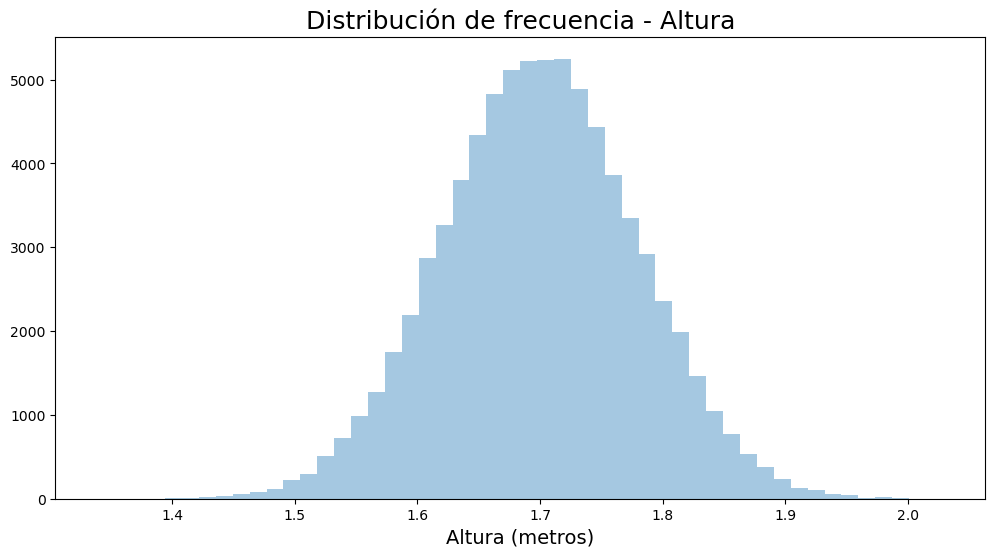

In [ ]:
# kde es para ver como se ajusta la línea a medida que va creciendo
ax = sns.distplot(datos.Altura, kde=False)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de frecuencia - Altura', fontsize=18)
ax.set_xlabel('Altura (metros)', fontsize=14)
ax

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_5728/2597978037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Altura, kde=True)


<Axes: title={'center': 'Distribución de frecuencia - Altura - KDE'}, xlabel='Altura (metros)', ylabel='Density'>

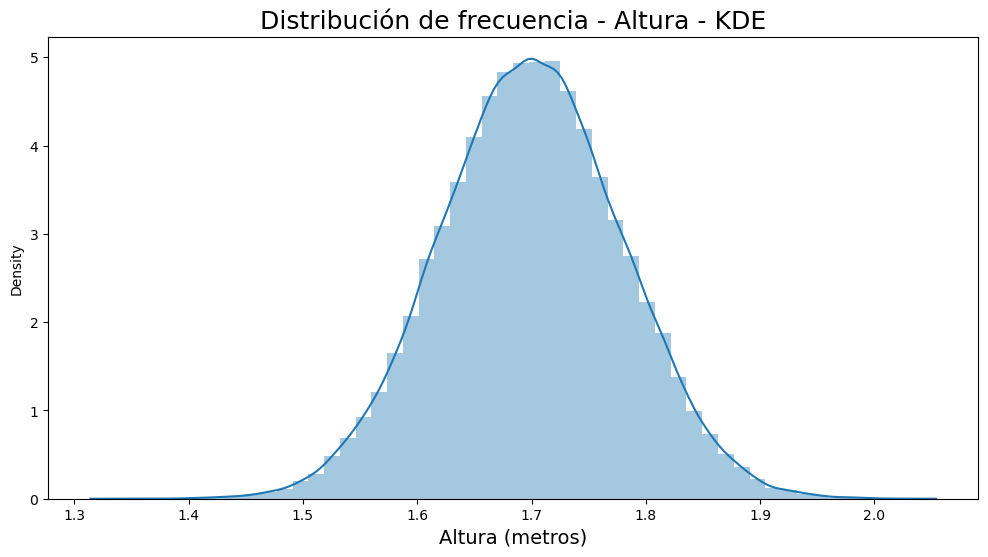

In [238]:
ax = sns.distplot(datos.Altura, kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title("Distribución de frecuencia - Altura - KDE", fontsize=18)
ax.set_xlabel("Altura (metros)", fontsize=14)
ax

/var/folders/45/nnwdvrcs63j3c_75jxv__q_80000gn/T/ipykernel_5728/2551308470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(datos.Edad, kde=True)


<Axes: title={'center': 'Distribución de frecuencia - Edad - KDE'}, xlabel='Edad (años)', ylabel='Density'>

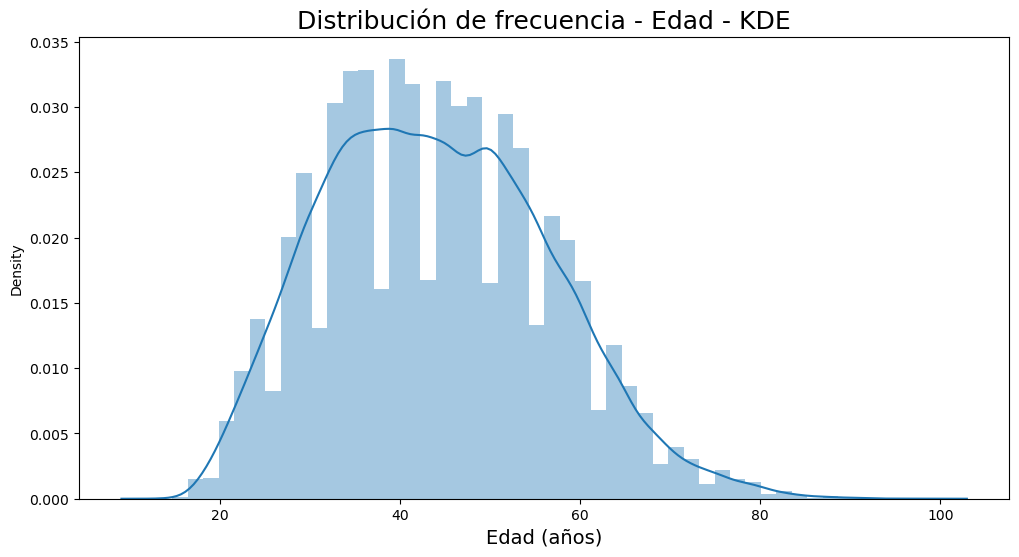

In [241]:
# Hacer un histograma con la edad
ax = sns.distplot(datos.Edad, kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribución de frecuencia - Edad - KDE", fontsize=18)
ax.set_xlabel("Edad (años)", fontsize=14)
ax